In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import src.linear_models as lm
import src.classifier_1x5_utils as utils

In [2]:
train = pd.read_csv("./data/train_redu.csv")
test = pd.read_csv("./data/test_redu.csv")

# Selecionando apenas 1 e 5

In [3]:
train1x5 = utils.filter_1x5(train)
test1x5 = utils.filter_1x5(test)

# Plot

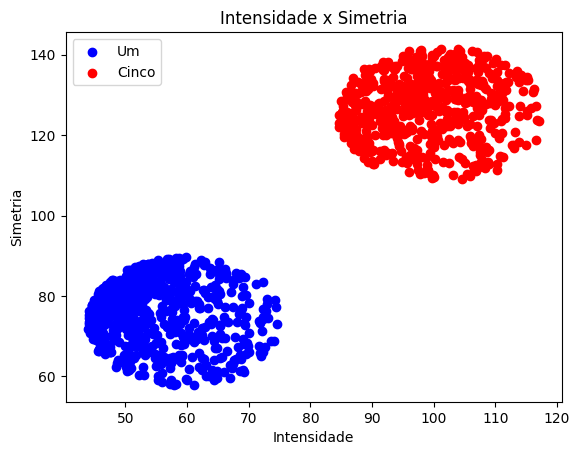

In [4]:
utils.plot1x5(train1x5)

# Treinamento

In [6]:
X_train = train1x5[["intensidade", "simetria"]].values
y_train = train1x5["label"].map(lambda x: -1 if x == 5 else 1).values
X_train = np.c_[np.ones(X_train.shape[0]), X_train]

X_test = test1x5[["intensidade", "simetria"]].values
y_test = test1x5["label"].values
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

In [9]:
linear_reg = lm.LinearRegression()
linear_reg.fit(X_train, y_train)

In [11]:
logistic_reg = lm.LogisticRegression()
logistic_reg.fit(X_train, y_train)

/home/luiz/Documents/UFPB/am/project/digits_classification/src/linear_models.py:49: RuntimeWarning: overflow encountered in exp
  gt = -(1/N) * sum([xi*yi / (1+np.exp(yi*w.dot(xi))) for xi, yi in zip(batchX, batchY)])


In [10]:
pocket_pla = lm.PocketPLA(15000)
pocket_pla.fit(X_train, y_train)

# Predição

In [13]:
y_pred_lreg = linear_reg.predict(X_test).map(lambda x: -1 if x == 5 else 1)
y_pred_rlog = logistic_reg.predict(X_test).map(lambda x: -1 if x == 5 else 1)
y_pred_pla = pocket_pla.predict(X_test).map(lambda x: -1 if x == 5 else 1)

In [14]:
# y_pred_pla = pocket_pla2.predict(X_test)

In [15]:
logistic_reg.getW()

array([12.81045651, -6.7777613 ,  5.68003927])

In [16]:
linear_reg.get_w()

array([ 3.58751288, -0.01875499, -0.02111635])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lreg)

1.0

In [22]:
pocket_pla = lm.PocketPLA(15000)
pocket_pla.fit(X_train, y_train)
y_pred_pla = pocket_pla.predict(X_test)
accuracy_score(y_test, y_pred_pla)

1.0

In [28]:
logistic_reg = lm.LogisticRegression(eta=0.1, tmax=15000)
logistic_reg.fit(X_train, y_train)
y_pred_rlog = logistic_reg.predict(X_test)
accuracy_score(y_test, y_pred_rlog)

/home/luiz/Documents/UFPB/am/project/digits_classification/src/linear_models.py:49: RuntimeWarning: overflow encountered in exp
  gt = -(1/N) * sum([xi*yi / (1+np.exp(yi*w.dot(xi))) for xi, yi in zip(batchX, batchY)])


0.5042881646655232

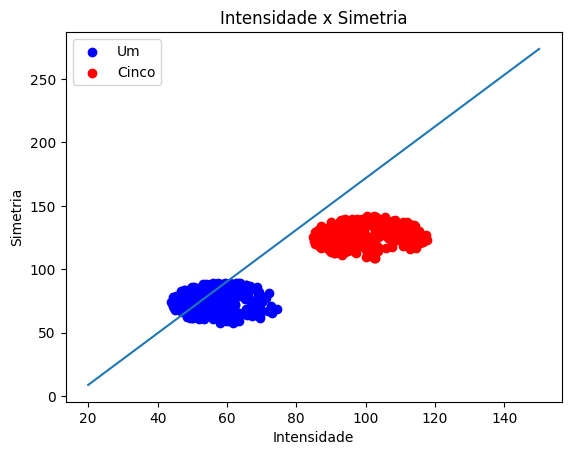

In [27]:
wei = logistic_reg.getW()

utils.plot1x5(train1x5, wei)

In [ ]:
def confusion_matrix(y_true, y_pred, class_1 = -1, class_2 = 1):
    VP = 0
    VN = 0
    FP = 0
    FN = 0
    
    for i in range(len(y_pred)):
        if (y_true[i] == y_pred[i]):
            if y_pred[i] == class_1:
                VP += 1
            else: # y_pred[i] == class_2:
                VN += 1
        else:
            if y_pred[i] == class_1:
                FP += 1
            else: # y_pred[i] == class_2:
                FN += 1            
    
    return np.array([[VP, FP],[FN, VN]])

def classification_report(y_true, y_pred, class_1 = -1, class_2 = 1):
    mc = confusion_matrix(y_true, y_pred)
    
    sup_c1 = 0
    sup_c2 = 0
    for i in y_pred:
        if i == class_1:
            sup_c1 += 1
        else:
            sup_c2 += 1
    
    
    VP = mc[0, 0] 
    FP = mc[0, 1] 
    FN = mc[1, 0] 
    VN = mc[1, 1] 
    
    accuracy = (VP + VN) / (VP + VN + FP + FN)
    precision_c1 = VP/(VP+FP)
    precision_c2 = VN/(VN+FN)
    
    recall_c1 = VP/(VP+FN)
    recall_c2 = VN/(VN+FP)
    
    f1_score_c1 = (2*precision_c1*recall_c1) / (precision_c1 + recall_c1)
    f1_score_c2 = (2*precision_c2*recall_c2) / (precision_c2 + recall_c2)
    
    return f"              precision    recall  f1-score   support\n\n" + \
           f"          {class_1}       {precision_c1:.2f}      {recall_c1:.2f}" + \
           f"      {f1_score_c1:.2f}       {sup_c1}\n" + \
           f"           {class_2}       {precision_c2:.2f}      {recall_c2:.2f}" + \
           f"      {f1_score_c2:.2f}        {sup_c2}\n\n" + \
           f"    accuracy                           {accuracy:.2f}       {len(y_pred)}"